In [35]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

# Paso 1: Realizar la solicitud a la API
url = 'http://idc.ventusarca.com.co/getdata2.php'  # URL de la API
respuesta = requests.get(url)

# Verificar si la solicitud fue exitosa
if respuesta.status_code == 200:
    datos_json = respuesta.json()  # Convertir la respuesta a JSON

    # Paso 2: Convertir el JSON en un DataFrame de pandas
    dfapi = pd.DataFrame(datos_json)

    # Paso 3: Visualizar los primeros registros del dataset
    dfapi.head()

    # (Opcional) Guardar el dataset como un archivo CSV
    dfapi.to_csv('/content/sample_data/dataset_api_ventusarca.csv', index=False)  # Guardar sin el índice
else:
    print(f"Error en la solicitud: {respuesta.status_code}")
df1 = pd.read_csv('/content/sample_data/dataset_api_ventusarca.csv')
df1['fecha'] = pd.to_datetime(df1['fecha'])
df = df1.drop('id', axis=1)
#df = df.set_index('fecha', inplace=True)

In [36]:
# Inspección básica del dataset
df1.info()          # Tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           150 non-null    int64         
 1   fecha        150 non-null    datetime64[ns]
 2   temperatura  150 non-null    float64       
 3   humedad      150 non-null    int64         
 4   heatIndex    150 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 6.0 KB


In [37]:
df.head()          # Primeras filas del dataset

,fecha,temperatura,humedad,heatIndex
0,2024-09-13 20:09:03,24.7,47,24.45
1,2024-09-13 19:39:02,24.9,47,24.67
2,2024-09-13 19:09:01,25.0,45,24.73
3,2024-09-13 18:39:00,25.3,43,25.01
4,2024-09-13 18:08:59,25.7,44,25.47


In [38]:
df.columns      # Ver las columnas del DataFrame

Index(['fecha', 'temperatura', 'humedad', 'heatIndex'], dtype='object')

In [41]:
# Estadísticas descriptivas (media, mediana, desviación estándar, etc.)
estadisticas = df.describe()
estadisticas


,fecha,temperatura,humedad,heatIndex
count,150,150.000000,150.000000,150.000000
mean,2024-09-12 06:22:10.566666752,23.262000,53.820000,23.065400
min,2024-09-10 16:06:14,19.700000,41.000000,18.930000
25%,2024-09-11 10:44:14.249999872,21.900000,48.000000,21.680000
50%,2024-09-12 06:53:02.500000,23.300000,54.000000,23.110000
75%,2024-09-13 01:31:02.750000128,24.900000,58.000000,24.715000
max,2024-09-13 20:09:03,26.400000,70.000000,26.870000
std,NaN,1.708591,6.411054,1.898338


In [42]:
print(df1.isnull().sum())

id             0
fecha          0
temperatura    0
humedad        0
heatIndex      0
dtype: int64


In [43]:
dfDia = df.groupby(df['fecha'].dt.date).mean()
dfDia

,fecha,temperatura,humedad,heatIndex
fecha,,,,
2024-09-10,2024-09-10 19:51:21.000000000,24.100000,46.250000,23.773750
2024-09-11,2024-09-11 11:26:56.644444672,22.768889,51.333333,22.441556
2024-09-12,2024-09-12 11:53:10.645833472,23.195833,55.812500,23.029583
2024-09-13,2024-09-13 10:08:46.560975616,23.553659,57.170732,23.515610


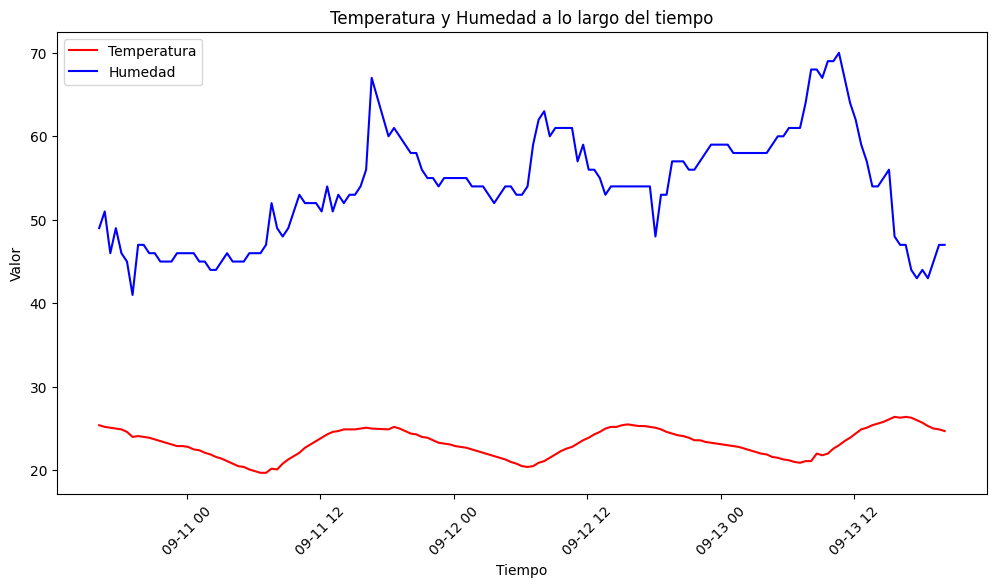

In [44]:
# Convertir la columna de timestamps en formato de fecha si es necesario
df['fecha'] = pd.to_datetime(df['fecha'])

plt.figure(figsize=(12,6))
plt.plot(df['fecha'], df['temperatura'], label='Temperatura', color='red')
plt.plot(df['fecha'], df['humedad'], label='Humedad', color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Temperatura y Humedad a lo largo del tiempo')
plt.legend()
plt.xticks(rotation=45)
plt.show()

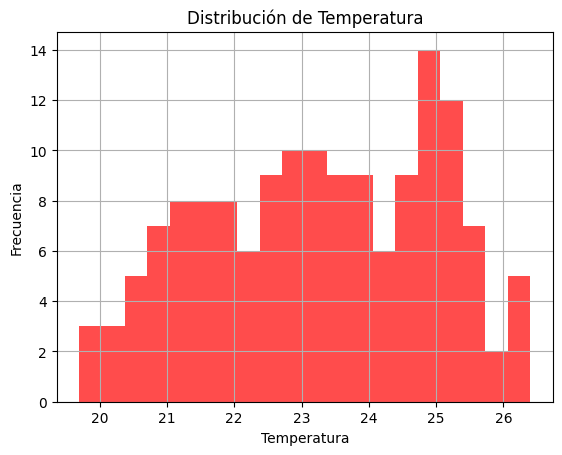

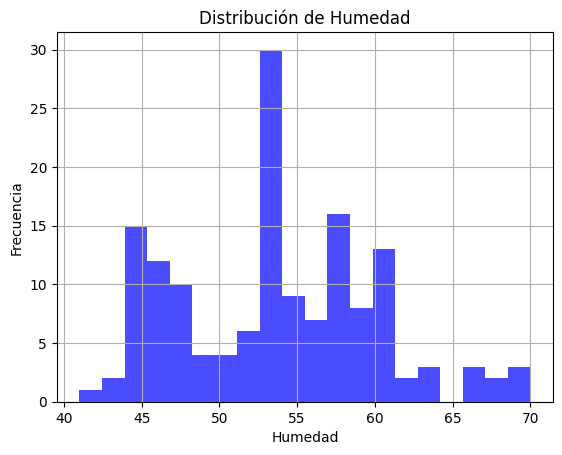

In [45]:
# Histograma de la temperatura
df['temperatura'].hist(bins=20, color='red', alpha=0.7)
plt.title('Distribución de Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la humedad
df['humedad'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Humedad')
plt.xlabel('Humedad')
plt.ylabel('Frecuencia')
plt.show()


In [46]:
print(df[['temperatura', 'humedad']].corr())

             temperatura   humedad
temperatura     1.000000 -0.106564
humedad        -0.106564  1.000000


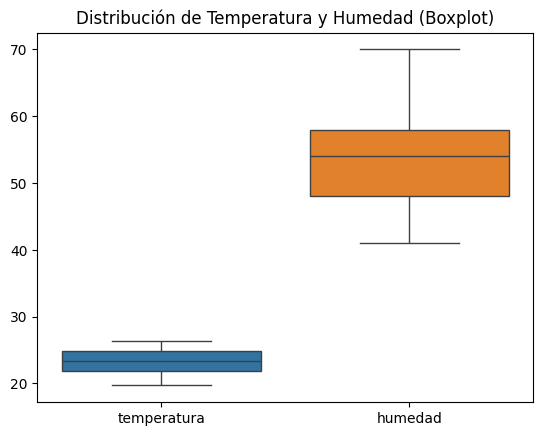

In [47]:
import seaborn as sns

# Boxplot de temperatura y humedad
sns.boxplot(data=df[['temperatura', 'humedad']])
plt.title('Distribución de Temperatura y Humedad (Boxplot)')
plt.show()

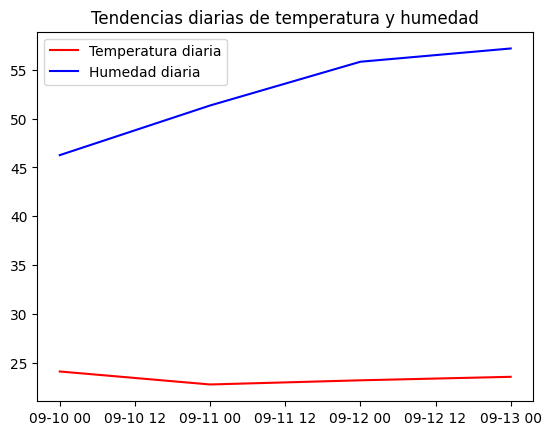

In [48]:
df.set_index('fecha', inplace=True)
# Media diaria de temperatura y humedad
daily_means = df.resample('D').mean()

plt.plot(daily_means.index, daily_means['temperatura'], label='Temperatura diaria', color='red')
plt.plot(daily_means.index, daily_means['humedad'], label='Humedad diaria', color='blue')
plt.title('Tendencias diarias de temperatura y humedad')
plt.legend()
plt.show()

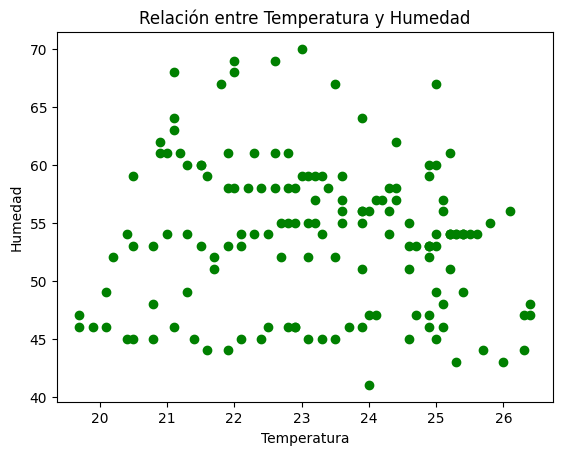

In [49]:
plt.scatter(df['temperatura'], df['humedad'], color='green')
plt.title('Relación entre Temperatura y Humedad')
plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.show()


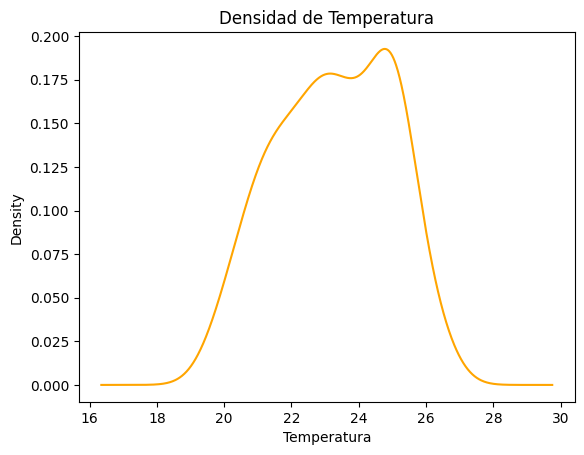

In [50]:
df['temperatura'].plot(kind='kde', color='orange')
plt.title('Densidad de Temperatura')
plt.xlabel('Temperatura')
plt.show()


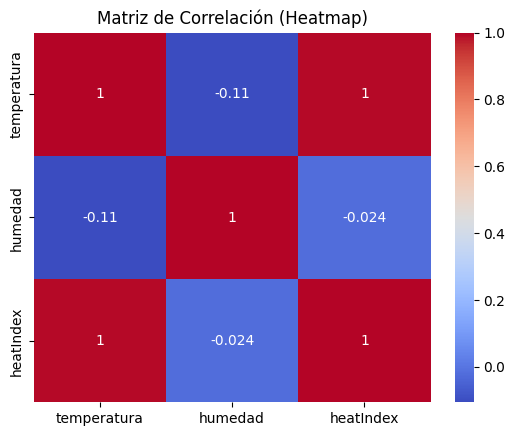

In [51]:
corr = df.corr()  # Matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Heatmap)')
plt.show()

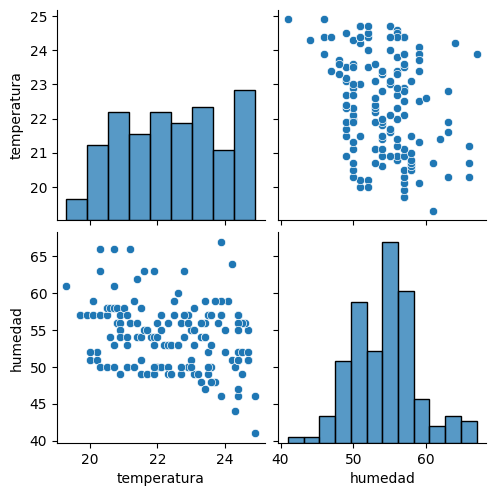

In [ ]:
sns.pairplot(df[['temperatura', 'humedad']])
plt.show()